In [2]:

!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 req

In [2]:
import pytesseract # biblioteca do teserract da google
import numpy as np # numpy/ numeros
import cv2 # opencv
from google.colab.patches import cv2_imshow # mostrar as imagens no colab
import re
from PIL import Image
import matplotlib.pyplot as plt
from pytesseract import Output
from PIL import ImageDraw, ImageFont, Image
import os


In [3]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-07-14 16:48:13--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-07-14 16:48:13--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-07-14 16:48:13--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

# Funcoes

In [18]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32): # funcao p escrever texto
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

In [19]:
def caixa_texto(resultado, img, cor = (255, 0, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 1)

  return x, y, img

# Codigo

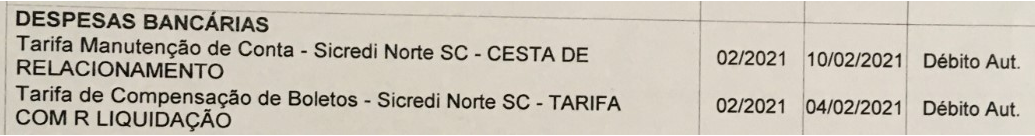

In [4]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png') # le a imagem em brg
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converte de bgr para rgb
cv2_imshow(rgb) # mostra a imagem em rgb

In [7]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [13]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

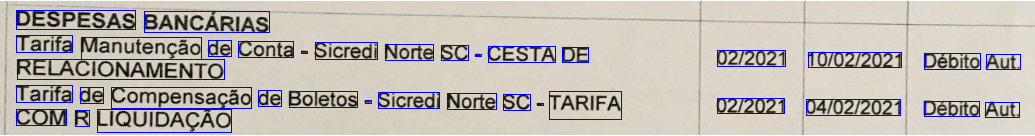

In [15]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [16]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

In [21]:
fonte = '/content/text-recognize/Imagens/calibri.ttf'


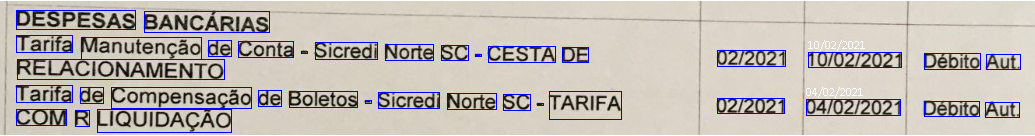

In [22]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)

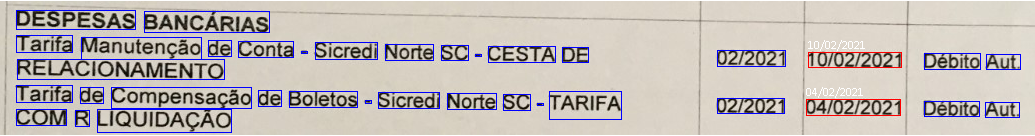

In [24]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia,(0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)

In [25]:
datas

['10/02/2021', '04/02/2021']

# Cenarios Naturais

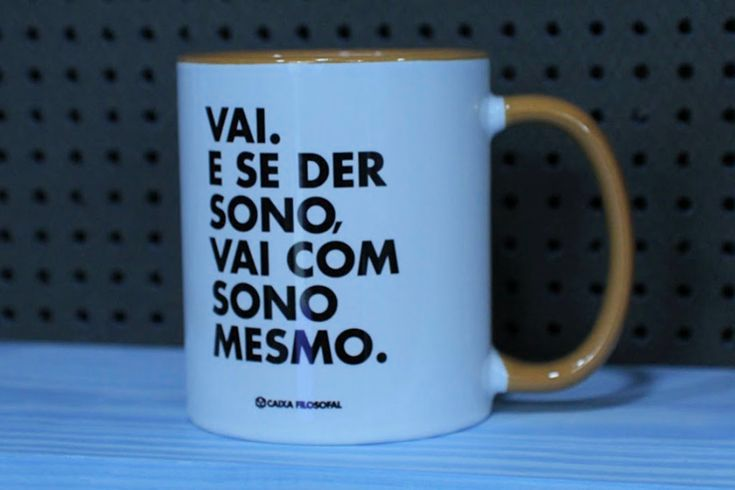

In [26]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [40]:
min_conf = 50 #@param {type: 'slider', min: 0, max: 100}

In [41]:
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  206,
  206,
  206,
  206,
  584,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  214,
  214,
 

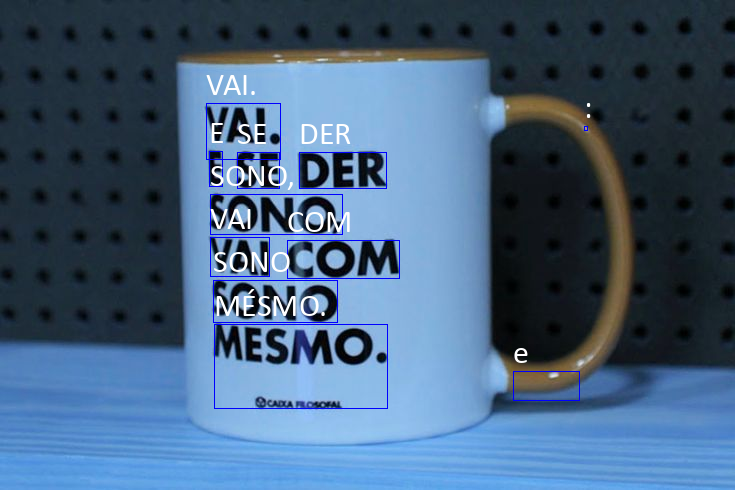

In [39]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

# Falso Positivo

In [43]:
resultado['text']

['',
 '',
 '',
 '',
 'VAI.',
 ':',
 '',
 '',
 'E',
 'SE',
 'DER',
 '',
 '',
 'SONO,',
 '',
 '',
 'VAI',
 'COM',
 '',
 '',
 'SONO',
 '',
 '',
 'MÉSMO.',
 'e']

In [45]:
resultado['conf']

['-1',
 '-1',
 '-1',
 '-1',
 85,
 63,
 '-1',
 '-1',
 56,
 56,
 91,
 '-1',
 '-1',
 91,
 '-1',
 '-1',
 48,
 90,
 '-1',
 '-1',
 89,
 '-1',
 '-1',
 60,
 54]

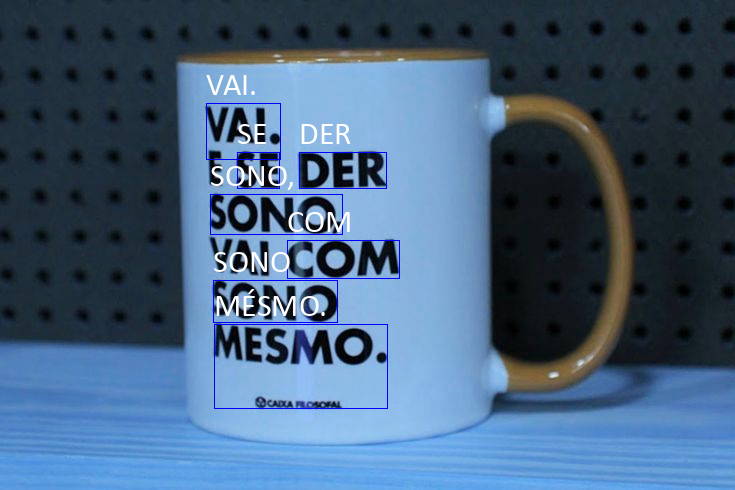

In [46]:
img_copia = rgb.copy()

for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:

    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 1:

      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)